In [1]:
# classical import for plotting and computing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import of the rbfregression modul
import rbfregression.core as rbfreg

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

## Some data to fit


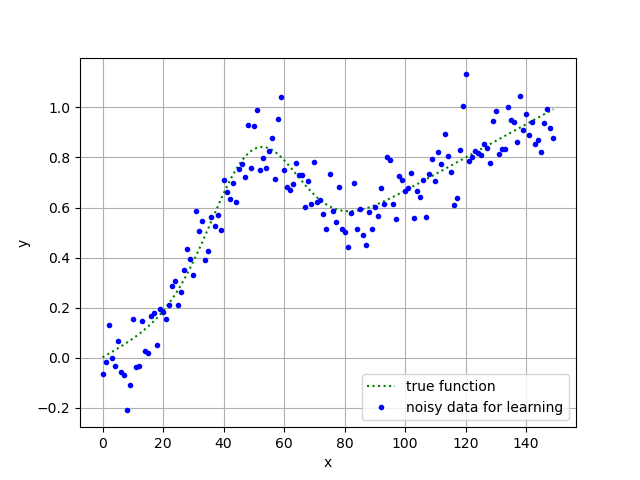

In [3]:
def function(x, s2 =.1):
    y = np.exp(-((x-50)/20.)**2)/2 + 1/150.*x
    y += s2 * np.random.randn(len(x))
    return y

# Real function values
X_true = np.arange(0, 150, 1.)
Y_true = function(X_true, s2=0)

# Key points
X_k = np.arange(10, 141, 20.) 


# Data for learning
X_l = np.arange(0, 150, 1.) 
Y_l = function(X_l)

X_k = np.atleast_2d(X_k).T
X_l = np.atleast_2d(X_l).T


plt.figure()
plt.plot(X_true, Y_true, ':g', label ='true function')
plt.plot(X_l, Y_l, '.b', label ='noisy data for learning')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#plt.savefig('Data.png')

## RBF kernel definition
the equation of the radial basis function kernel is given by:
$$
k(x_i, x_j) = \exp\left(-\frac{d^2}{2 r^2}\right)
$$
where $r$ is the kernel bandwidth, and $d$ is the euclidian distance between the two points $x_i$ and $x_j$.


In [4]:
def Gauss_kernel(d, radius):
    radius *= 0.707
    result = np.exp(-(d **2 ) / (2.0 * radius**2)) 
    return result


The RBF kernel can be plotted for different values of $r$:


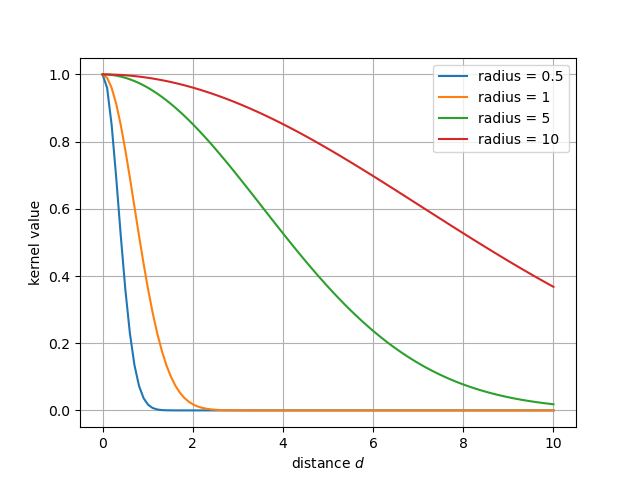

In [5]:
# kernel plot for different radius
plt.figure()
d = np.linspace(0, 10, 100)
for radius in [0.5, 1, 5, 10]:
    plt.plot(d, Gauss_kernel(d, radius), label = 'radius = {}'.format(radius))
plt.xlabel('distance $d$')
plt.ylabel('kernel value')
plt.grid()
plt.legend()


## Fit the RBF regression

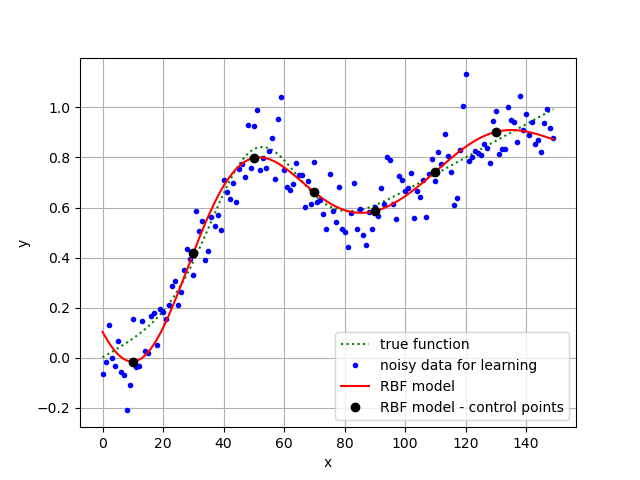

In [6]:
# Create the RegularizedRBF instance
RBF = rbfreg.RegularizedRBF(kernel=Gauss_kernel)

# Set the control points (key points)
RBF.set_key_points(X_k)

# Compute the fit
RBF.fit(X_l, Y_l, regularization=0.0, radius = 25)

# Eval the model at points
Y_s = RBF.eval(X_l)
Y_k = RBF.eval(X_k)

# Plot them all
plt.figure()
plt.plot(X_true, Y_true, ':g', label ='true function')
plt.plot(X_l, Y_l, '.b', label ='noisy data for learning')
plt.plot(X_l, Y_s, '-r', label ='RBF model')
plt.plot(X_k, Y_k, 'ok', label ='RBF model - control points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Play with hyper parameters of the model
Using the sliders below, you can control the value of the kernel bandwidth $r$.

interactive(children=(IntSlider(value=25, description='radius', min=1), Output()), _dom_classes=('widget-inter…

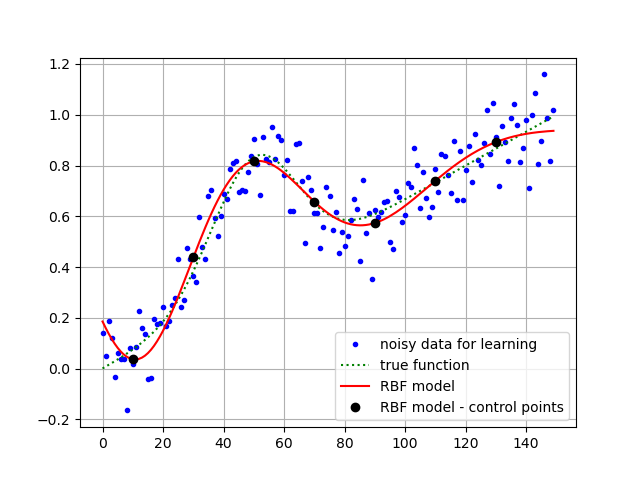

In [7]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox

Y_l = function(X_l[:,0], s2=.1)

plt.figure()

plt.plot(X_l, Y_l, '.b', label ='noisy data for learning')
plt.plot(X_true, Y_true, ':g', label ='true function')
rbf_model,  = plt.plot([], [], '-r', label ='RBF model')
key_points, = plt.plot([], [], 'ok', label ='RBF model - control points')
plt.grid()
plt.legend()


@widgets.interact( radius=(1,100))
def plot_oscil_1(radius=25):
    regularization=0,   
    RBF = rbfreg.RegularizedRBF(kernel=Gauss_kernel)
    RBF.set_key_points(X_k)
    RBF.fit(X_l, Y_l, regularization=regularization, radius = radius)
    Y_s = RBF.eval(X_l)
    Y_k = RBF.eval(X_k)

    rbf_model.set_data(X_l, Y_s)
    key_points.set_data(X_k, Y_k)

    